# Lince - Student Team for Aerospace and Rocketry UC3M - 2023

Launched at EUROC'23, with a target apogee of 3k meters using a COTS Solid motor. The main parachute deployed at apogee
Permission to use flight data given by Saúl Hidalgo, 2024.

These results were extracted out of the flight card:

1. Team number: `23`
2. Launch date: `October 12th, 2023. around 10hrs local time`
3. Last simulated apogee before flight: `2806 m` 
4. Official recorded apogee: `3587 m`

The relative error of altitude apogee is only `0.6%`

In [38]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
from rocketpy import Function, Environment, Flight, Rocket, SolidMotor
from rocketpy.motors import CylindricalTank, SolidMotor
from rocketpy.motors.tank import MassFlowRateBasedTank

import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-colorblind")

## Environment 


Gravity Details

Acceleration of gravity at surface level:    9.8007 m/s²
Acceleration of gravity at   4.000 km (ASL): 9.7888 m/s²


Launch Site Details

Launch Date: 2023-10-15 10:00:00 UTC | 2023-10-15 11:00:00 Portugal
Launch Site Latitude: 39.38970°
Launch Site Longitude: -8.28896°
Reference Datum: WGS84
Launch Site UTM coordinates: 44415.43 W    4373388.31 N
Launch Site UTM zone: 30S
Launch Site Surface Elevation: 158.0 m


Atmospheric Model Details

Atmospheric Model Type: Reanalysis
Reanalysis Maximum Height: 4.000 km
Reanalysis Time Period: from 2023-10-12 08:00:00 to 2023-10-15 18:00:00 utc
Reanalysis Hour Interval: 1 hrs
Reanalysis Latitude Range: From 40.0° to 39.0°
Reanalysis Longitude Range: From -9.0° to -7.0°

Surface Atmospheric Conditions

Surface Wind Speed: 169.35 m/s
Surface Wind Direction: 349.35°
Surface Wind Heading: 4.22°
Surface Pressure: 998.30 hPa
Surface Temperature: 291.24 K
Surface Air Density: 1.194 kg/m³
Surface Speed of Sound: 342.12 m/s


Earth Model 

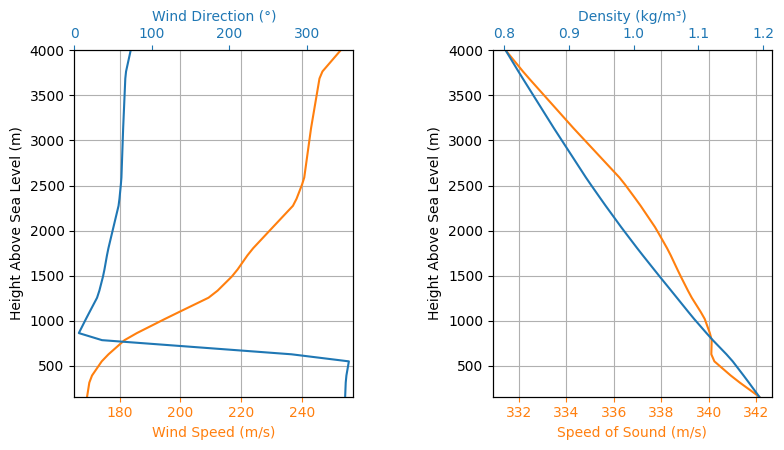

In [ ]:
env = Environment(
    date=(2023, 10, 12, 10),
    latitude=39.3897,
    longitude=-8.288964,
    elevation=158,
    datum="WGS84",
    timezone="Portugal",
)

env.set_atmospheric_model(
    type="Reanalysis",
    file="../../data/weather/euroc_2023_all_windows.nc",
    dictionary="ECMWF",
)
env.max_expected_height = 4000
env.info()

## Motor

In [41]:
M1101 = SolidMotor(
    thrust_source="../../data/motors/cesaroni/Cesaroni_M1101.eng",
    burn_time=4.736,
    grain_number=4,
    grain_density=1363,
    grain_initial_inner_radius=0.01,
    grain_outer_radius=0.035,
    grain_initial_height=0.16,
    nozzle_radius=0.0335,
    nozzle_position=0,
    throat_radius=0.0114,
    grain_separation=0.00,
    grains_center_of_mass_position=0.315533,
    dry_inertia=(0, 0, 0),
    center_of_dry_mass_position=1.061,
    dry_mass=0,
)

Nozzle Details
Nozzle Radius: 0.0335 m
Nozzle Throat Radius: 0.0114 m

Grain Details
Number of Grains: 4
Grain Spacing: 0.0 m
Grain Density: 1363 kg/m3
Grain Outer Radius: 0.035 m
Grain Inner Radius: 0.01 m
Grain Height: 0.16 m
Grain Volume: 0.001 m3
Grain Mass: 0.771 kg

Motor Details
Total Burning Time: 4.736 s
Total Propellant Mass: 3.083 kg
Structural Mass Ratio: 0.000
Average Propellant Exhaust Velocity: 1686.522 m/s
Average Thrust: 1097.889 N
Maximum Thrust: 1436.62 N at 0.05 s after ignition.
Total Impulse: 5199.605 Ns



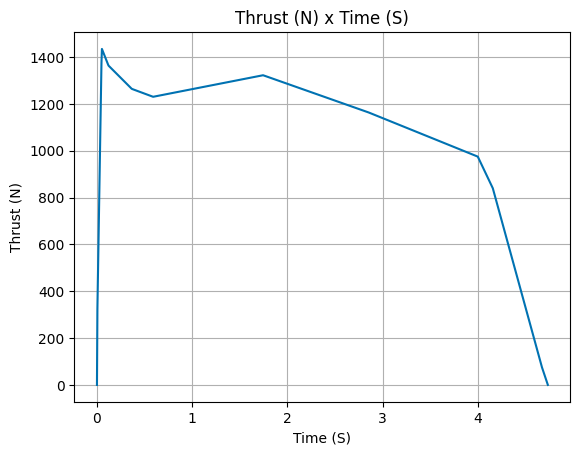

In [42]:
M1101.info()

## Rocket and Aerodynamic surfaces

In [43]:
LincePreDeploy = Rocket(
    radius=0.052,
    mass=11.6851352,
    inertia=(4.9939475, 4.9939475, 0.0213204),
    center_of_mass_without_motor=1.061,
    power_off_drag="../../data/rockets/lince/drag_coefficient_power_off.csv",
    power_on_drag="../../data/rockets/lince/drag_coefficient_power_on.csv",
    coordinate_system_orientation="tail_to_nose",
)

LincePreDeploy.add_motor(M1101, position=0)

LincePreDeploy.set_rail_buttons(1.54049, 0.13549)

NoseCone = LincePreDeploy.add_nose(length=0.28, kind="vonKarman", position=2.109417)

Fins = LincePreDeploy.add_trapezoidal_fins(
    n=4, span=0.0825, root_chord=0.17, tip_chord=0.0445, position=0.17
)
Tail = LincePreDeploy.add_tail(
    top_radius=0.052, bottom_radius=0.047, length=0.03, position=0
)

In [44]:
Main = LincePreDeploy.add_parachute(
    "Main", cd_s=3.9, trigger="apogee", sampling_rate=150, lag=0, noise=(0, 0, 0)
)

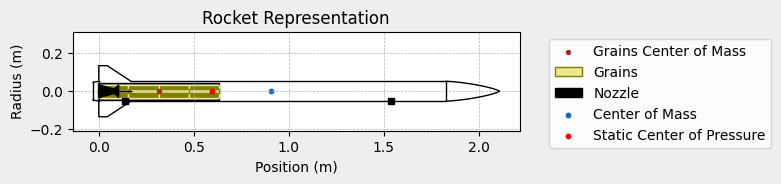

In [45]:
LincePreDeploy.draw()

In [46]:
LincePostDeploy = Rocket(
    radius=0.052,
    mass=11.3521352,
    inertia=(4.8109919, 4.8109919, 0.0211382),
    center_of_mass_without_motor=0.846961,
    power_off_drag="../../data/rockets/lince/drag_coefficient_power_off.csv",
    power_on_drag="../../data/rockets/lince/drag_coefficient_power_on.csv",
    coordinate_system_orientation="tail_to_nose",
)

LincePostDeploy.add_motor(M1101, position=0)

LincePostDeploy.set_rail_buttons(1.54049, 0.13549)

NoseCone = LincePostDeploy.add_nose(length=0.28, kind="vonKarman", position=2.109417)

Fins = LincePostDeploy.add_trapezoidal_fins(
    n=4, span=0.0825, root_chord=0.17, tip_chord=0.0445, position=0.17
)
Tail = LincePostDeploy.add_tail(
    top_radius=0.052, bottom_radius=0.047, length=0.03, position=0
)

In [47]:
Main = LincePostDeploy.add_parachute(
    "Main", cd_s=3.9, trigger="apogee", sampling_rate=150, lag=0, noise=(0, 0, 0)
)

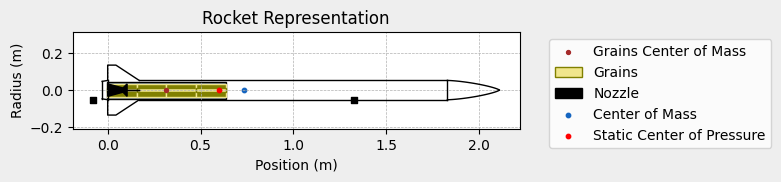

In [37]:
LincePostDeploy.draw()

## Payload 

In [49]:
Payload = Rocket(
    radius=0.052,
    mass=0.330,
    inertia=(0.000465, 0.000465, 0.000182),
    center_of_mass_without_motor=0.98551,
    power_off_drag=0.5,
    power_on_drag=0.5,
    coordinate_system_orientation="tail_to_nose",
)

Payload.set_rail_buttons(0.47949, -0.92551)

In [50]:
Main = Payload.add_parachute(
    "Main", cd_s=0.159248, trigger="apogee", sampling_rate=150, lag=0, noise=(0, 0, 0)
)

## Flight Simulation

In [65]:
flight = Flight(
    rocket=LincePreDeploy,
    environment=env,
    inclination=84,
    heading=133,
    rail_length=12,
)


Apogee State

Apogee Time: 24.686 s
Apogee Altitude: 3325.191 m (ASL) | 3167.191 m (AGL)
Apogee Freestream Speed: 26.955 m/s
Apogee X position: 594.839 m
Apogee Y position: -518.303 m
Apogee latitude: 39.3850375°
Apogee longitude: -8.2820411°


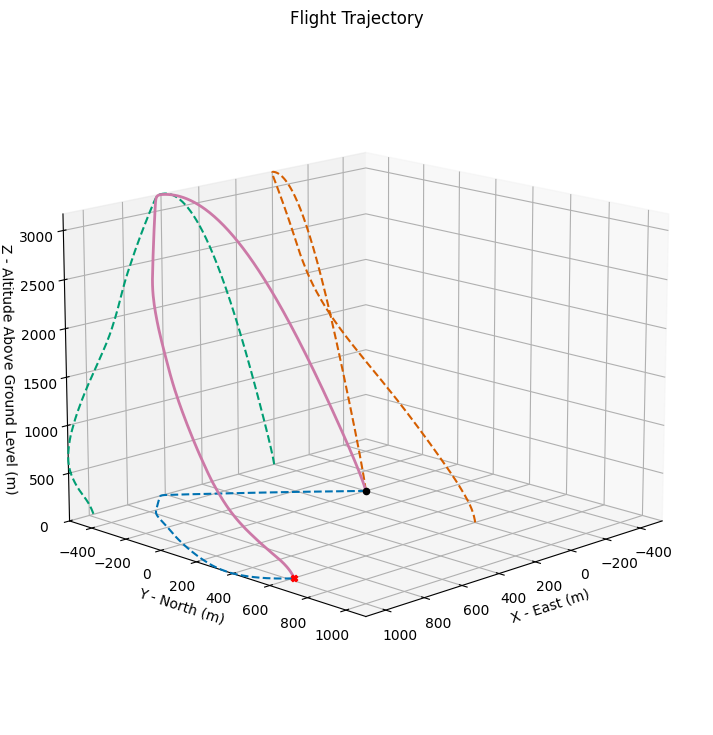

In [66]:
flight.prints.apogee_conditions()
flight.plots.trajectory_3d()

In [67]:
flight_post_deploy = Flight(
    rocket=LincePostDeploy,
    environment=env,
    inclination=80,
    heading=90,
    rail_length=12,
    initial_solution=(
        140.27290271152566,
        584.7038053555185,
        -545.2450961402308,
        674.8722648277553,
        -3.9631969740080985e-7,
        3.695741259818271e-7,
        -22.211899545682893,
        0.2840905658912332,
        -0.27979518384188506,
        0.643508300224056,
        -0.6533668979414597,
        -0.4337186008657805,
        -1.4538641209949378e-5,
        0.0,
    ),
)


Apogee State

Apogee Time: 137.331 s
Apogee Altitude: 740.278 m (ASL) | 516.872 m (AGL)
Apogee Freestream Speed: 22.469 m/s
Apogee X position: 584.704 m
Apogee Y position: -545.245 m
Apogee latitude: 39.3847952°
Apogee longitude: -8.2821591°


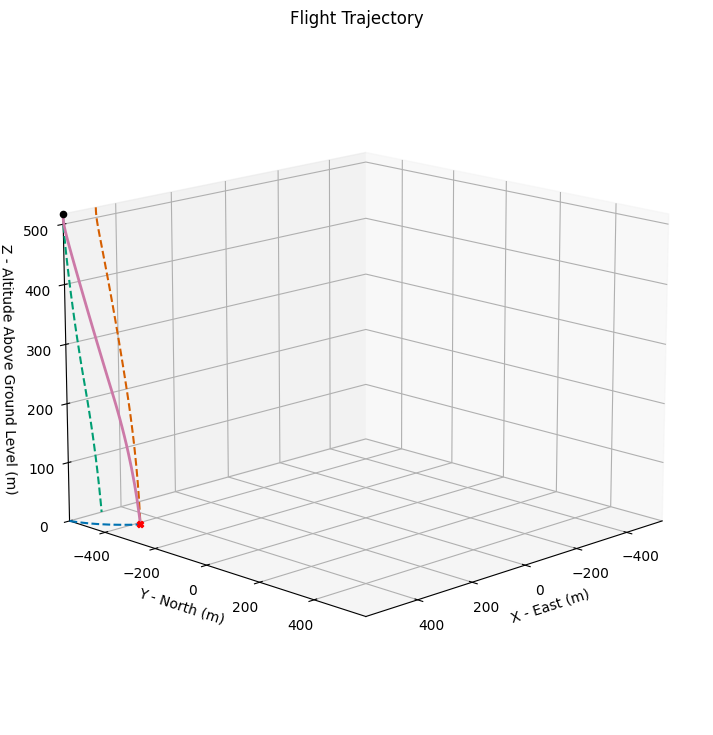

In [68]:
flight_post_deploy.prints.apogee_conditions()
flight_post_deploy.plots.trajectory_3d()

In [59]:
flight_payload = Flight(
    rocket=Payload,
    environment=env,
    inclination=80,
    heading=90,
    rail_length=12,
    initial_solution=(
        140.27290271152566,
        584.7038053555185,
        -545.2450961402308,
        674.8722648277553,
        -3.9631969740080985e-7,
        3.695741259818271e-7,
        -22.211899545682893,
        0.2840905658912332,
        -0.27979518384188506,
        0.643508300224056,
        -0.6533668979414597,
        -0.4337186008657805,
        -1.4538641209949378e-5,
        0.0,
    ),
)


Apogee State

Apogee Time: 138.016 s
Apogee Altitude: 725.200 m (ASL) | 516.872 m (AGL)
Apogee Freestream Speed: 22.469 m/s
Apogee X position: 584.704 m
Apogee Y position: -545.245 m
Apogee latitude: 39.3847952°
Apogee longitude: -8.2821591°


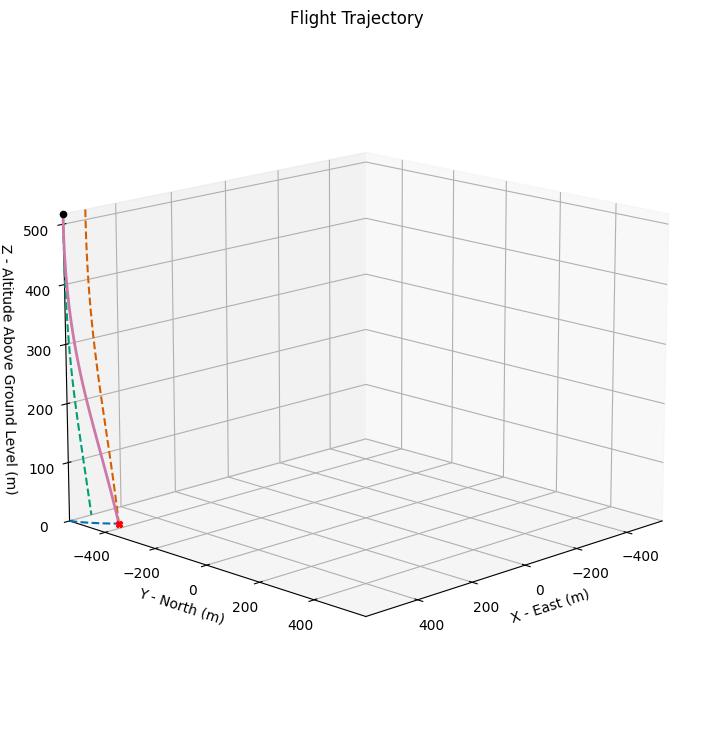

In [60]:
flight_payload.prints.apogee_conditions()
flight_payload.plots.trajectory_3d()

## Data analysis

In [13]:
from rocketpy.simulation.flight_data_importer import FlightDataImporter


columns_map = {
    "ts": "time",
    "altitude[m]": "altitude",
    "velocity[m/s]": "vz",
}

cots_altimeter_flight = FlightDataImporter(
    name="COTS Altimeter Flight",
    paths="../../data/rockets/polito/altimeter_cavour.csv",
    columns_map=columns_map,
    units=None,
    interpolation="linear",
    extrapolation="zero",
    delimiter=",",
    encoding="utf-8",
)

The following attributes were create and are now available to be used:  ['time', 'altitude', 'vz']


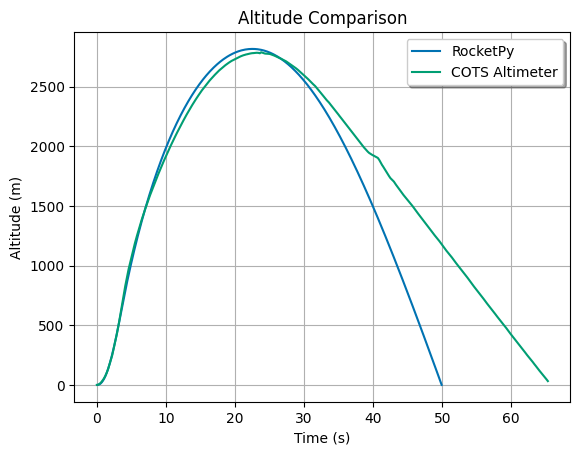

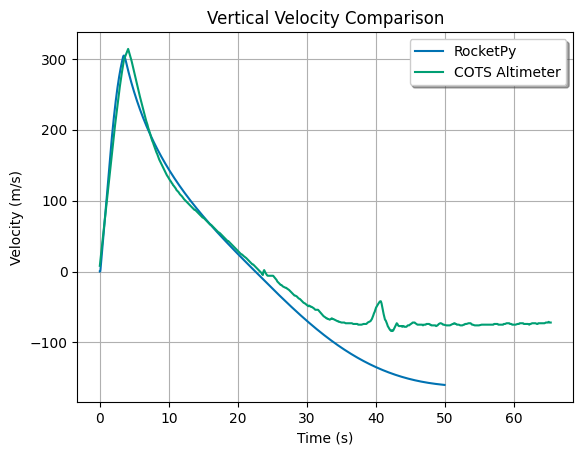

In [14]:
Function.compare_plots(
    [
        (test_flight.altitude, "RocketPy"),
        (cots_altimeter_flight.altitude, "COTS Altimeter"),
    ],
    title="Altitude Comparison",
    xlabel="Time (s)",
    ylabel="Altitude (m)",
)

Function.compare_plots(
    [
        (test_flight.vz, "RocketPy"),
        (cots_altimeter_flight.vz, "COTS Altimeter"),
    ],
    title="Vertical Velocity Comparison",
    xlabel="Time (s)",
    ylabel="Velocity (m/s)",
)